Inspired by https://github.com/muyueh/Data_Exploration

# Daily Show Guests (data: fivethirtyeight)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.library['fivethirtyeight']['axes.prop_cycle']

'#30a2da'
'#fc4f30'
'#e5ae38'
'#6d904f'
'#8b8b8b'


In [3]:
guests = pd.read_csv('./data/daily-show-guests/daily_show_guests.csv')

http://pandas.pydata.org/pandas-docs/stable/basics.html

In [4]:
guests.head(5)

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [5]:
guests.tail(3)

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
2690,2015,stand-up comedian,8/3/15,Comedy,Amy Schumer
2691,2015,actor,8/4/15,Acting,Denis Leary
2692,2015,comedian,8/5/15,Comedy,Louis C.K.


In [10]:
from numpy import random

In [33]:
samp = random.choice(guests.shape[0], min(int(guests.shape[0] * 0.1), 10), replace=False)

In [35]:
samp.sort()

In [36]:
guests.iloc[samp]

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
17,1999,comedian,10/26/99,Comedy,Louie Anderson
193,2000,journalist,10/31/00,Media,David Frost
292,2000,actor,6/29/00,Acting,John C. Reilly
923,2004,actor,6/14/04,Acting,Stanley Tucci
1250,2006,American Political figure,6/13/06,Politician,Ken Mehlman
1544,2008,university professor,5/12/08,Academic,Douglas J. Feith
1602,2008,film actor,9/24/08,Acting,Aaron Eckhart
1843,2010,actor,3/17/10,Acting,Snoop Dogg
1943,2011,Baseball player,1/19/11,Athletics,Paul Clemens
2507,2014,actor,3/26/14,Acting,Jude Law


In [37]:
guests.index

RangeIndex(start=0, stop=2693, step=1)

In [38]:
guests.columns

Index(['YEAR', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Raw_Guest_List'], dtype='object')

In [39]:
guests.describe()

,YEAR
count,2693.000000
mean,2006.816190
std,4.828177
min,1999.000000
25%,2003.000000
50%,2007.000000
75%,2011.000000
max,2015.000000


In [50]:
guests['YEAR'].value_counts()

2000    169
2003    166
2013    166
1999    166
2010    165
2012    164
2008    164
2004    164
2009    163
2011    163
2014    163
2005    162
2006    161
2002    159
2001    157
2007    141
2015    100
Name: YEAR, dtype: int64

In [51]:
guests['GoogleKnowlege_Occupation'].value_counts().head(15)

actor                596
actress              271
journalist           180
author               102
Journalist            72
comedian              64
us senator            50
Author                48
television host       39
Comedian              39
writer                30
stand-up comedian     26
Writer                22
professor             22
commentator           20
Name: GoogleKnowlege_Occupation, dtype: int64

In [52]:
guests['Group'].value_counts().head(15)

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Name: Group, dtype: int64

In [54]:
guests['Group'].isnull().value_counts()

False    2662
True       31
Name: Group, dtype: int64

In [55]:
guests['Raw_Guest_List'].isnull().value_counts()

False    2693
Name: Raw_Guest_List, dtype: int64

### Check for null

In [56]:
guests[guests['Group'].isnull()]

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
39,1999,NaN,12/15/99,NaN,Greatest Millennium Special
129,1999,NaN,7/21/99,NaN,Third Anniversary Special
149,1999,NaN,8/30/99,NaN,The Daily Show Summer Spectacular
202,2000,NaN,11/20/00,NaN,Tales of Survival with Vance DeGeneres
213,2000,NaN,12/13/00,NaN,no guest
303,2000,NaN,7/19/00,NaN,Fourth Anniversary Special
308,2000,NaN,7/31/00,NaN,Campaign Trail to the Road to the White House ...
434,2001,NaN,5/2/01,NaN,No guest
509,2002,NaN,10/14/02,NaN,Road to Washington Special
592,2002,NaN,5/23/02,NaN,Matt Walsh Goes To Hawaii


In [58]:
guests[guests['Group'].isnull()]['YEAR'].value_counts()

2003    7
2012    4
2000    4
2008    3
2004    3
1999    3
2002    2
2013    1
2010    1
2007    1
2006    1
2001    1
Name: YEAR, dtype: int64

### Shortest and longest guest list

In [63]:
guests.iloc[guests['Raw_Guest_List'].map(lambda i: len(i)).sort_values().head(15).index]

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
1053,2005,Music Producer,3/24/05,Musician,RZA
946,2004,NaN,7/30/04,NaN,None
225,2000,Singer-songwriter,2/14/00,Musician,Moby
2175,2012,NaN,3/15/12,NaN,None
2248,2012,NaN,8/31/12,NaN,none
1978,2011,singer-songwriter,11/30/11,Musician,Bono
2255,2012,Product line,9/19/12,Misc,Pink
1173,2006,NaN,11/1/06,NaN,None
449,2001,Singer,6/21/01,Musician,Mí_a
1796,2010,NaN,10/28/10,NaN,none


In [64]:
guests.iloc[guests['Raw_Guest_List'].map(lambda i: len(i)).sort_values(ascending=False).head(15).index]

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
754,2003,NaN,5/26/03,NaN,Iraq - A Look Baq (or how we learned to stop r...
753,2003,NaN,5/26/03,NaN,Iraq - A Look Baq (or how we learned to stop r...
308,2000,NaN,7/31/00,NaN,Campaign Trail to the Road to the White House ...
379,2001,Comedian,12/10/01,Comedy,Stephen Colbert as Al Sharpton (Sharpton had b...
677,2003,actor,10/7/03,Acting,Ronny Cox Marc Singer Robert Amstler Arianna H...
229,2000,former senator from kansas,2/2/00,Politician,"Focus on New Hampshire Special, special guest ..."
2315,2013,actor,12/18/13,Acting,"Steve Carell, Will Ferrell, David Koechner & P..."
2314,2013,actor,12/18/13,Acting,"Steve Carell, Will Ferrell, David Koechner & P..."
2313,2013,actor,12/18/13,Acting,"Steve Carell, Will Ferrell, David Koechner & P..."
1919,2010,actor,8/3/10,Acting,Will Ferrell (The interview also featured Rob ...


In [40]:
guests_most_frequent = guests.pivot_table(index='Raw_Guest_List', aggfunc=np.count_nonzero).sort_values(by='Show', ascending=False)

In [42]:
guests_most_frequent.index

Index(['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Paul Rudd',
       'Ricky Gervais', 'Tom Brokaw', 'Richard Lewis', 'Bill O'Reilly',
       'Will Ferrell', 'Reza Aslan',
       ...
       'Jake Johannsen', 'Jake Gyllenhaal[8]', 'Jake Adelstein',
       'Jack's Mannequin', 'Jack Rakove', 'Ja Rule', 'J.J. Abrams',
       'J. K. Simmons', 'J. K. Rowling', 'Jonathan Macey'],
      dtype='object', name='Raw_Guest_List', length=1669)

In [43]:
guests_most_frequent.columns

Index(['GoogleKnowlege_Occupation', 'Group', 'Show', 'YEAR'], dtype='object')

In [44]:
guests_most_frequent.head()

,GoogleKnowlege_Occupation,Group,Show,YEAR
Raw_Guest_List,,,,
Fareed Zakaria,19,19,19,19
Denis Leary,17,17,17,17
Brian Williams,16,16,16,16
Paul Rudd,13,13,13,13
Ricky Gervais,13,13,13,13


In [45]:
groups_most_frequent = guests.pivot_table(index='Group', aggfunc=np.count_nonzero).sort_values(by='Show', ascending=False)

In [47]:
groups_most_frequent.shape

(17, 4)

In [48]:
groups_most_frequent

,GoogleKnowlege_Occupation,Raw_Guest_List,Show,YEAR
Group,,,,
Acting,930,930,930,930
Media,751,751,751,751
Politician,308,308,308,308
Comedy,150,150,150,150
Musician,123,123,123,123
Academic,103,103,103,103
Athletics,52,52,52,52
Misc,45,45,45,45
Government,40,40,40,40


## Start plotting

In [65]:
number_guests = guests.pivot_table(index='YEAR', values='Raw_Guest_List', aggfunc=np.count_nonzero)

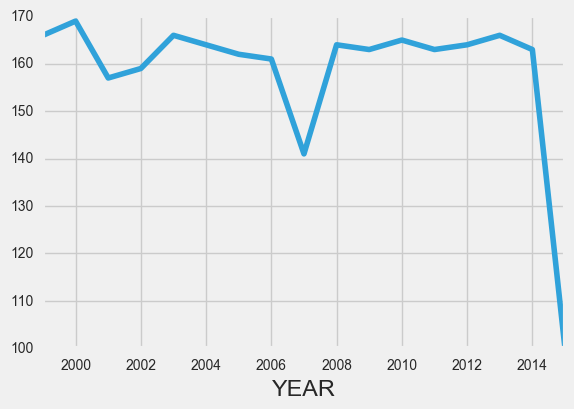

In [66]:
sns.tsplot(number_guests, time=number_guests.index)

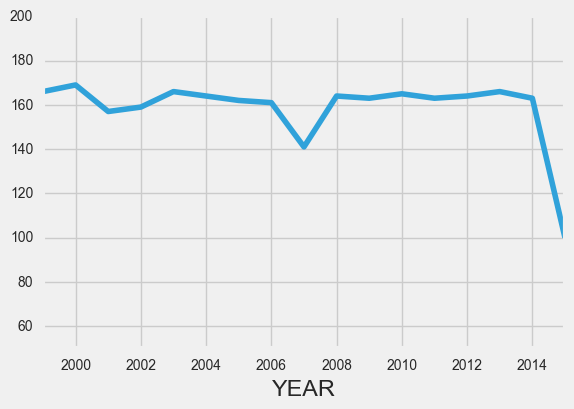

In [71]:
plt.ylim(50, 200)
sns.tsplot(number_guests, time=number_guests.index)

In [72]:
guests_per_group = guests.pivot_table(index=['YEAR', 'Group'], values='Raw_Guest_List', aggfunc=np.count_nonzero)

In [75]:
guests_per_group.head(15)

YEAR  Group         
1999  Acting            108
      Comedy             25
      Media              11
      Musician           17
      Politician          2
2000  Acting            100
      Advocacy            1
      Athletics           3
      Business            1
      Comedy             12
      Media              21
      Musician           13
      Political Aide      1
      Politician         13
2001  Academic            2
Name: Raw_Guest_List, dtype: int64

In [76]:
guests_per_group.shape

(224,)

In [77]:
guests_per_group.index

MultiIndex(levels=[[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], ['Academic', 'Acting', 'Advocacy', 'Athletics', 'Business', 'Clergy', 'Comedy', 'Consultant', 'Government', 'Media', 'Military', 'Misc', 'Musician', 'Political Aide', 'Politician', 'Science', 'media']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

guests_per_group is now a Series rather than a DataFrame... let's do reset_index()

In [79]:
guests_per_group = guests_per_group.reset_index()

In [80]:
guests_per_group.shape

(224, 3)

In [81]:
guests_per_group.index

RangeIndex(start=0, stop=224, step=1)

In [82]:
guests_per_group.columns

Index(['YEAR', 'Group', 'Raw_Guest_List'], dtype='object')

In [83]:
guests_per_group.head()

,YEAR,Group,Raw_Guest_List
0,1999,Acting,108
1,1999,Comedy,25
2,1999,Media,11
3,1999,Musician,17
4,1999,Politician,2


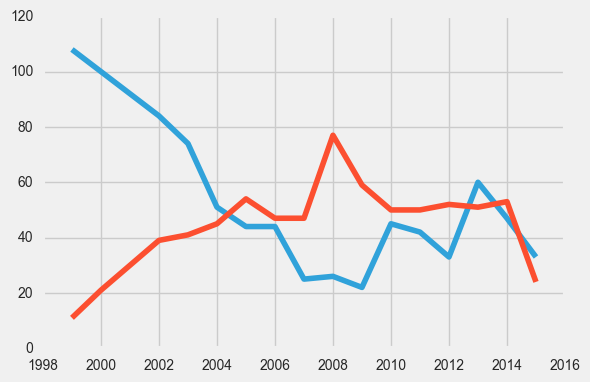

In [84]:
Acting = guests_per_group[guests_per_group['Group'] == 'Acting']
Media = guests_per_group[guests_per_group['Group'] == 'Media']

plt.plot(Acting['YEAR'], Acting['Raw_Guest_List'], Media['YEAR'], Media['Raw_Guest_List'])

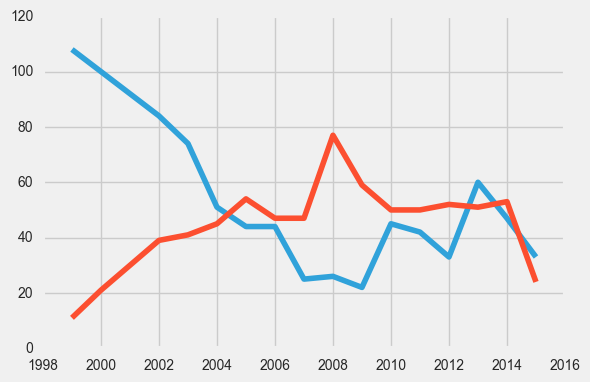

In [87]:
plt.plot(Acting['YEAR'], Acting['Raw_Guest_List'])
plt.plot(Media['YEAR'], Media['Raw_Guest_List'])

OK these two ways are the same?

### Try with per group

In [89]:
guests_per_group_hor = guests.pivot_table(index='YEAR', columns='Group', values='Raw_Guest_List', aggfunc=np.count_nonzero)

In [92]:
guests_per_group_hor.iloc[1:5, 1:5]

Group,Acting,Advocacy,Athletics,Business
YEAR,,,,
2000,100.0,1.0,3.0,1.0
2001,92.0,NaN,1.0,NaN
2002,84.0,1.0,2.0,NaN
2003,74.0,NaN,NaN,NaN


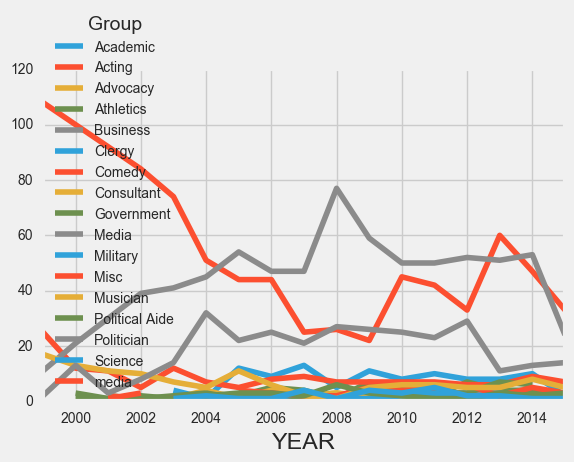

In [93]:
guests_per_group_hor.plot()

Muyueh: 重新做前一天做失敗的折線圖。所以 matplot 做折線圖的方式，是連續呼叫兩次。或是把資料整理成「寬」的 pivot table，然後呼叫一次 .plot()。

### Top groups

In [115]:
groups_most_frequent.head(5).index

Index(['Acting', 'Media', 'Politician', 'Comedy', 'Musician'], dtype='object', name='Group')

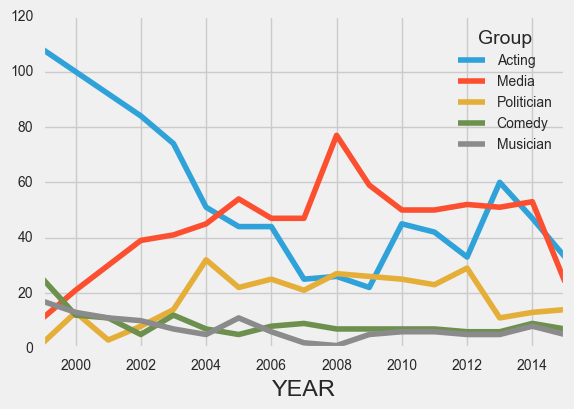

In [121]:
guests_per_group_hor.loc[:, groups_most_frequent.head(5).index].plot()

## number of groups per year (diversity)

In [102]:
guests.pivot_table(index='YEAR', values='Group', aggfunc=pd.Series.nunique)

YEAR
1999     5
2000     9
2001    11
2002    12
2003    12
2004    14
2005    14
2006    14
2007    16
2008    14
2009    16
2010    15
2011    16
2012    15
2013    14
2014    14
2015    13
Name: Group, dtype: int64

Verify...

In [110]:
guests[(guests['YEAR'] == 1999)]['Group'].value_counts()

Acting        108
Comedy         25
Musician       17
Media          11
Politician      2
Name: Group, dtype: int64

In [112]:
guests[(guests['YEAR'] == 2000)]['Group'].value_counts()

Acting            100
Media              21
Musician           13
Politician         13
Comedy             12
Athletics           3
Business            1
Political Aide      1
Advocacy            1
Name: Group, dtype: int64

In [111]:
guests[(guests['YEAR'] == 2015)]['Group'].value_counts()

Acting            33
Media             24
Politician        14
Comedy             7
Musician           5
Political Aide     3
Misc               3
Athletics          3
Advocacy           3
Academic           2
Military           1
Business           1
Science            1
Name: Group, dtype: int64

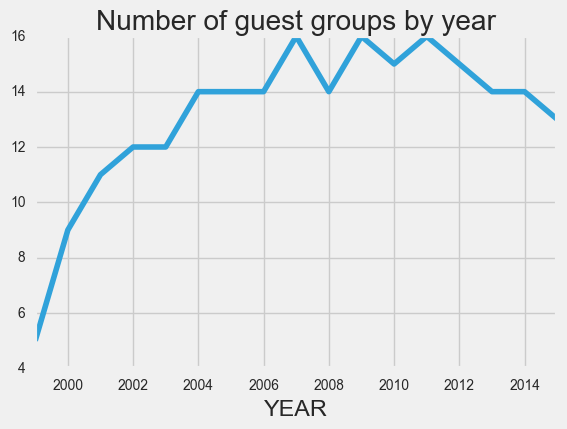

In [123]:
guests.pivot_table(index='YEAR', values='Group', aggfunc=pd.Series.nunique).plot(title='Number of guest groups by year')

# TODO: time when a group first appear